<a href="https://colab.research.google.com/github/693080593/research/blob/master/Stratified_Test_Set_K_Fold_More_Modified_Data_3_Sets_040621_%5B3%5D_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude More Modified Data ML 032121 Stratified Test.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:540:11]


Bio-crude dataset has 525 data points with 9 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield,Group
0,100.00000,0.00000,0.00000,0.00,0.0000,0.00,0.000000,98.500000,1
11,72.40000,12.90000,0.00000,0.00,11.6000,0.00,3.100000,74.800000,2
22,0.00000,0.00000,39.50000,20.60,0.0000,30.20,1.500000,63.200000,3
33,33.00000,33.00000,16.50000,16.50,0.0000,0.00,0.000000,58.100000,4
44,19.70000,13.50000,0.00000,0.00,22.9000,0.00,7.300000,54.300000,5
55,50.00000,0.00000,0.00000,0.00,50.0000,0.00,0.000000,50.100000,6
66,53.00000,11.00000,0.00000,0.00,29.0000,0.00,7.000000,48.000000,7
77,17.90000,44.30000,0.00000,0.00,25.3000,0.00,5.800000,45.900000,8
88,33.40000,22.40000,0.00000,0.00,39.5000,0.00,4.700000,43.900000,9
99,28.00000,52.00000,0.00000,0.00,12.0000,0.00,8.000000,43.000000,10


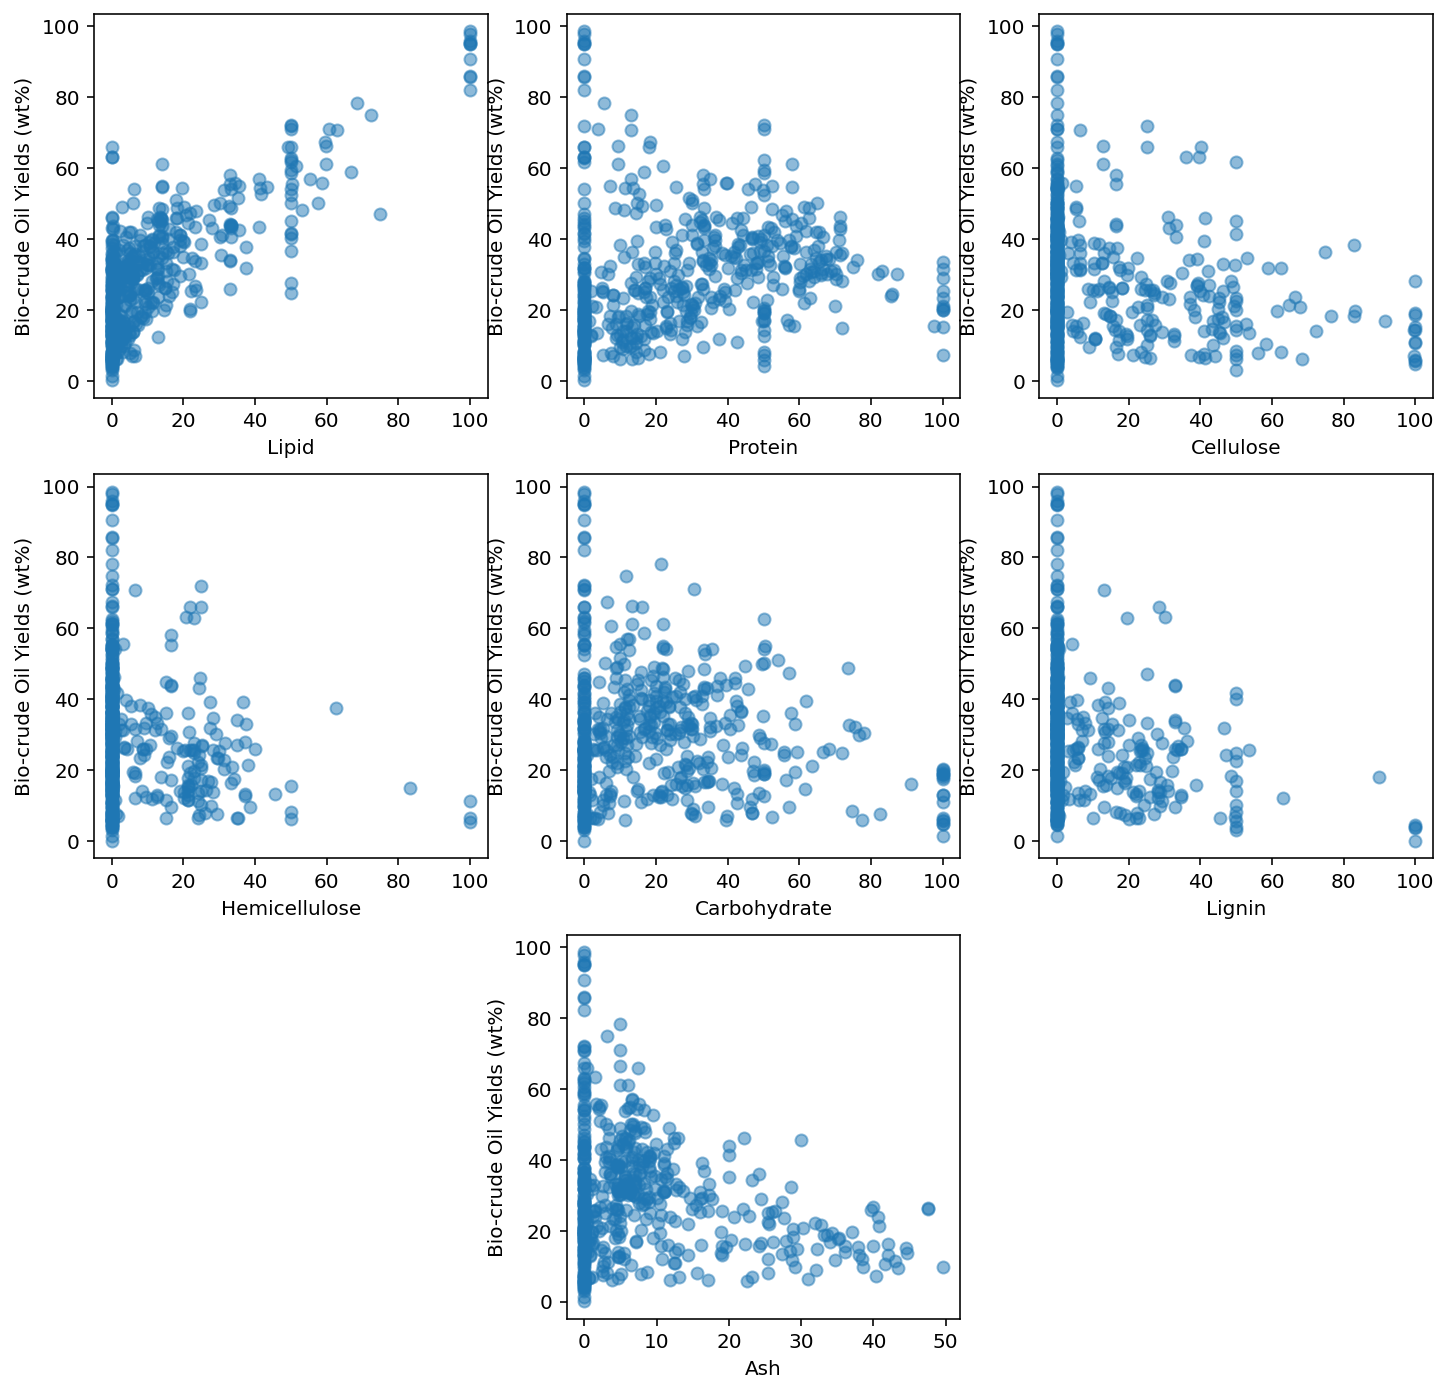

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

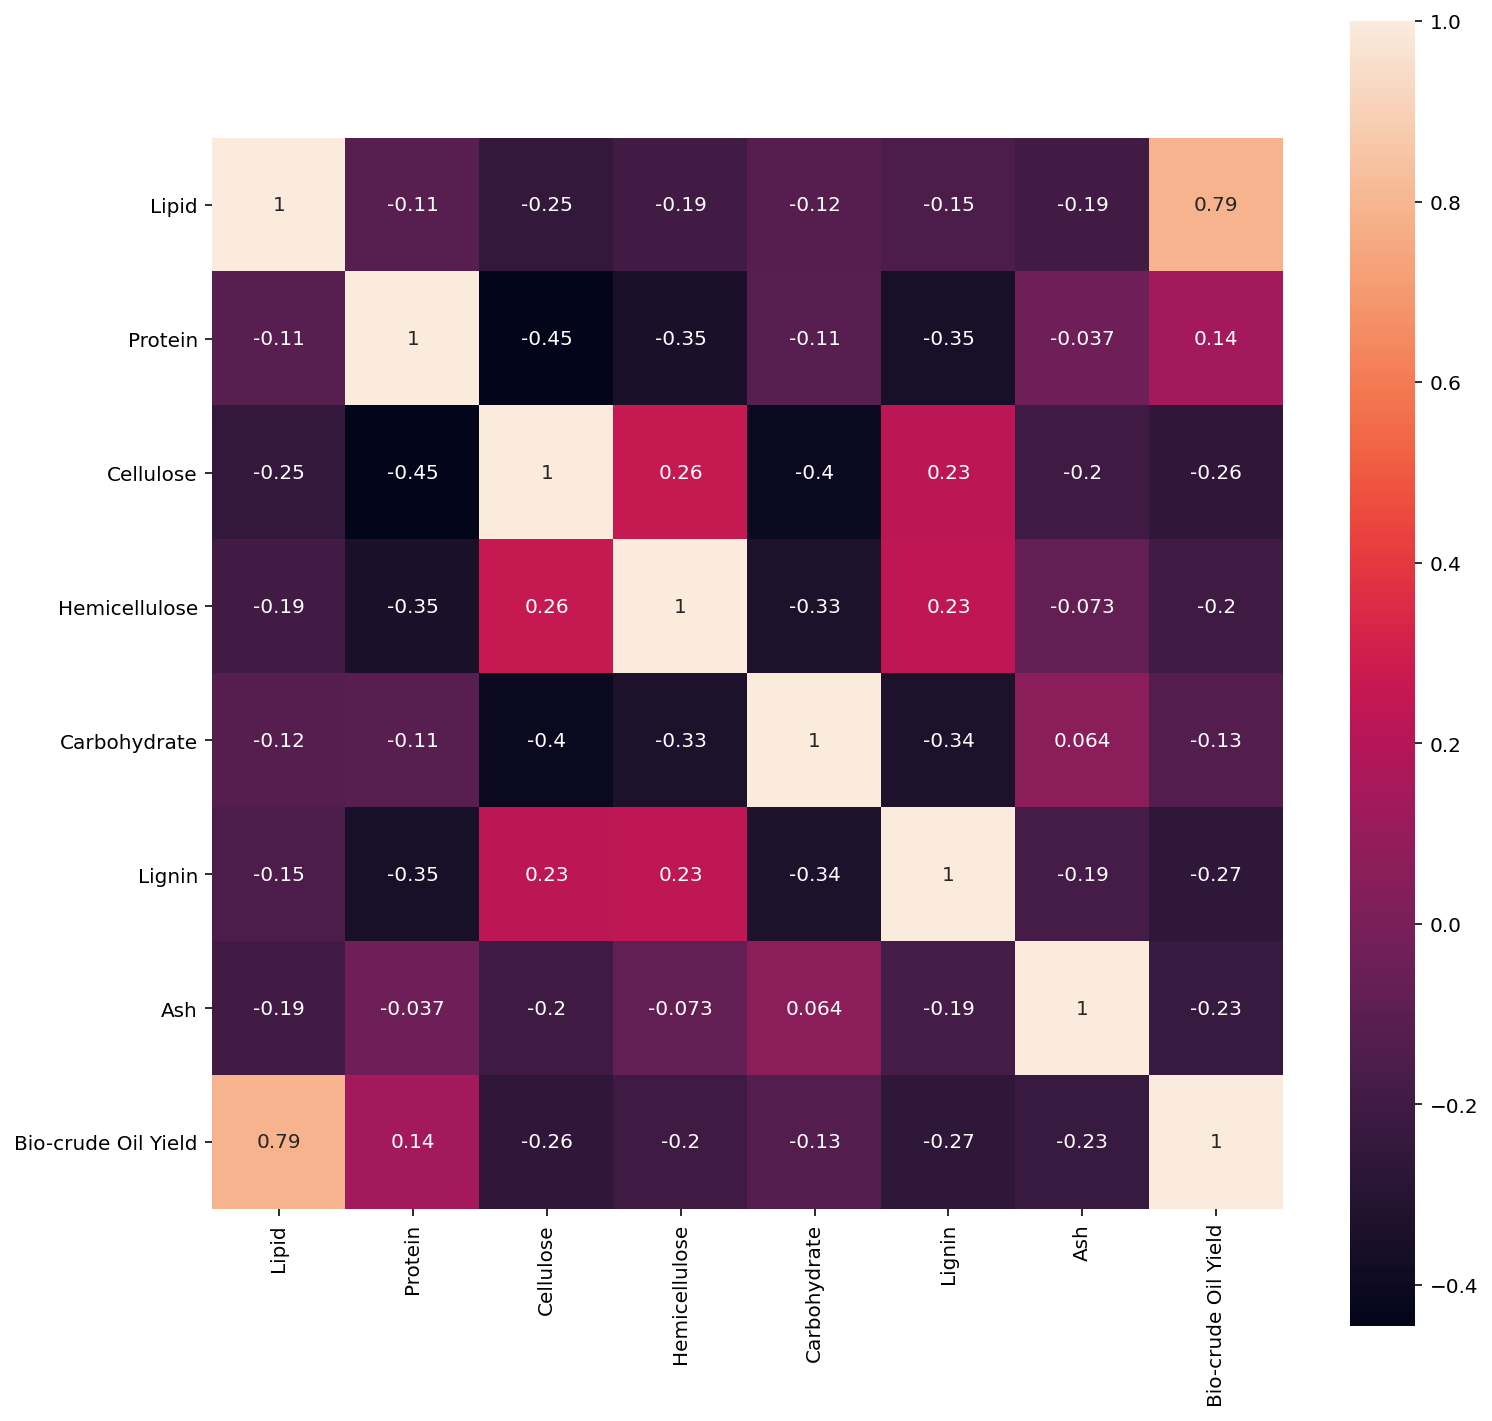

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for i in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'Stratified KFold'
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=i)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  df = pd.concat([Features, Oil_Yields], axis=1)
  
  # Lets split the data into 10 folds. 
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=26)
  
  group = df.loc[:,'Group']
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in skf.split(df, group):
    
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    
    X_train=train.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_train=train['Bio-crude Oil Yield']
    
    X_test=test.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_test=test['Bio-crude Oil Yield']

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Values of R2 of test set", r2_test_all)
  print("Difference Values of R2 Max and Min of test set", max(r2_test_all)-min(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))
  #print("Values of MRE of test set", MRE_test_all)
  #print("Difference Values of MRE Max and Min of test set", max(MRE_test_all)-min(MRE_test_all))
  #print("Optimal model has MRE of valid set:", MRE_valid)

In [6]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'Stratified KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.1, stratify=group2, random_state=108)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

# Lets split the data into 10 folds.  
kf =KFold(n_splits=10, shuffle=True, random_state=182)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features_new, Oil_Yields):

  X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
  y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 3.074226851931675
Standard deviation of MAE of training set 0.09368303777660013
Mean value of MAE of test set 6.686915610150878
Standard deviation of MAE of test set 1.0593535802200051

Mean value of RMSE of training set 4.302516254692139
Standard deviation of RMSE of training set 0.1468101105796135
Mean value of RMSE of test set 8.795779202514195
Standard deviation of RMSE of test set 1.4552074815955438

Mean value of R2 of training set 0.9391903223727234
Standard deviation of R2 of training set 0.004105465091004445
Mean value of R2 of test set 0.730935236363843
Standard deviation of R2 of test set 0.08893204743387484

Mean value of MRE of training set 0.10303367100101612
Standard deviation of MRE of training set 0.0027650362669775427
Mean value of MRE of test set 0.22419206836650768
Standard deviation of MRE of test set 0.030177893844681197

Optimal model has MAE of valid set: 6.285774881499587
Optimal model has RMSE of valid set: 8.02392147805094
Op

Text(0.5, 1.0, 'y_pred vs. y_true')

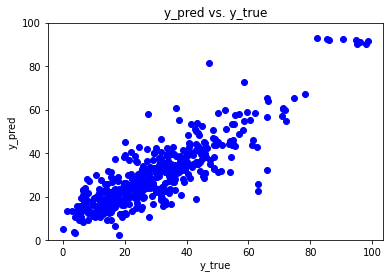

In [8]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

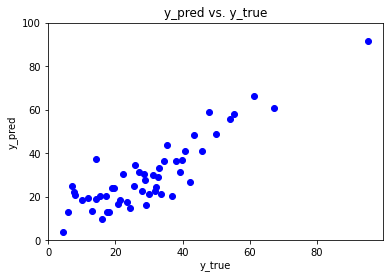

In [7]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 210, 11)

for i in range(10, 210, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':i,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 21, 1)

for i in range(1, 21, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':110,'max_depth':i,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 11, 1)

for i in range(1, 11, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':110,'max_depth':15,'min_samples_leaf':i,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_split 参数的最佳取值(2, 43, 20)

for i in range(2, 5, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':110,'max_depth':15,'min_samples_leaf':1,'min_samples_split':i,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_features 参数的最佳取值(1, 8, 1)

for i in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':110,'max_depth':15,'min_samples_leaf':1,'min_samples_split':2,'max_features':i,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [15]:
# random_state 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=108)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)
  
  # Lets split the data into 10 folds.  
  kf =KFold(n_splits=10, shuffle=True, random_state=182)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in kf.split(Features_new, Oil_Yields):
    
    X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    params = {'n_estimators':110,'max_depth':15,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':i}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)

1
Mean value of R2 of training set 0.9395238086653773
Mean value of R2 of test set 0.7556613794320695
R2 score of valid set 0.8010625711629751
Max value of R2 of test set 0.862245441335153
Standard deviation of R2 of test set 0.07947116485976011
Train-Test: 0.18386242923330787
Testmax-Valid: 0.06118287017217794
2
Mean value of R2 of training set 0.9396526919253538
Mean value of R2 of test set 0.7531887845678582
R2 score of valid set 0.7909710004906525
Max value of R2 of test set 0.8644388548956423
Standard deviation of R2 of test set 0.07718563862962605
Train-Test: 0.18646390735749563
Testmax-Valid: 0.07346785440498982
3
Mean value of R2 of training set 0.9395068901334037
Mean value of R2 of test set 0.7566793267390408
R2 score of valid set 0.8033295954992484
Max value of R2 of test set 0.8658875572194025
Standard deviation of R2 of test set 0.07555567074161573
Train-Test: 0.1828275633943629
Testmax-Valid: 0.06255796172015404
4
Mean value of R2 of training set 0.9392413106696178
Mean v

In [16]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'Stratified KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.1, stratify=group2, random_state=108)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

# Lets split the data into 10 folds.  
kf =KFold(n_splits=10, shuffle=True, random_state=182)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features_new, Oil_Yields):

  X_train, X_test = Features_new.iloc[train_index,:],Features_new.iloc[test_index,:]
  y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
  
  params = {'n_estimators':110,'max_depth':15,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':129}

  model = RandomForestRegressor(**params)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 3.078470250186405
Standard deviation of MAE of training set 0.09787305968664918
Mean value of MAE of test set 6.421108113493553
Standard deviation of MAE of test set 1.1247436969541058

Mean value of RMSE of training set 4.273692684824342
Standard deviation of RMSE of training set 0.13028034950055345
Mean value of RMSE of test set 8.332581775675768
Standard deviation of RMSE of test set 1.436420275675722

Mean value of R2 of training set 0.940019903279787
Standard deviation of R2 of training set 0.003485399988318062
Mean value of R2 of test set 0.7617792314431048
Standard deviation of R2 of test set 0.07182591382693226

Mean value of MRE of training set 0.1031791249380076
Standard deviation of MRE of training set 0.003045109012046078
Mean value of MRE of test set 0.21545445858466833
Standard deviation of MRE of test set 0.033925846047346477

Optimal model has MAE of valid set: 5.960518755382921
Optimal model has RMSE of valid set: 7.577708888187557
Opt

Text(0.5, 1.0, 'y_pred vs. y_true')

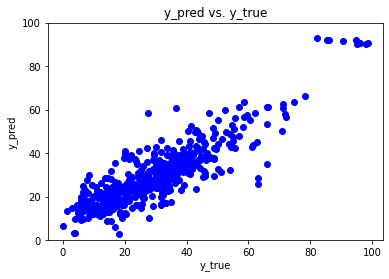

In [17]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

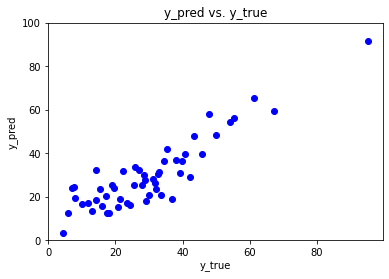

In [18]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_valid_predict,'Test Data':y_valid}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_test_set_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.512540
 2) Protein                        0.107034
 3) Ash                            0.104168
 4) Carbohydrate                   0.082232
 5) Cellulose                      0.074183
 6) Lignin                         0.073973
 7) Hemicellulose                  0.045871


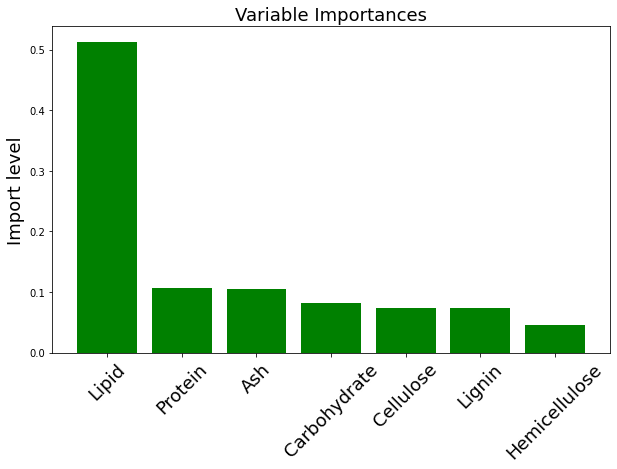

In [19]:
import matplotlib.pyplot as plt

Features = Original_Features.drop('Group', axis=1)

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')